In [1]:
from reddit_db.db_manager import RedditDBManager
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
manager = RedditDBManager()


# Trends

In [3]:
df = manager.get_all_sentiments()
df

,comment_id,negative_score,neutral_score,positive_score,pred_label
0,nda1t43,0.766607,0.226007,0.007386,negative
1,ndafvrl,0.101994,0.734912,0.163094,neutral
2,ndashxx,0.952456,0.041361,0.006183,negative
3,nd91cpt,0.691888,0.285430,0.022682,negative
4,nd91ofq,0.084058,0.490794,0.425148,neutral
...,...,...,...,...,...
21677,nelyaiw,0.175345,0.642005,0.182651,neutral
21678,nelysw8,0.754303,0.212199,0.033498,negative
21679,nelz2a9,0.923419,0.065732,0.010849,negative
21680,nelz870,0.511146,0.466057,0.022797,negative


In [4]:
cols = ["negative_score", "neutral_score", "positive_score"]
df_long = df[cols].melt(var_name="Sentiment", value_name="Probability")
df_long

,Sentiment,Probability
0,negative_score,0.766607
1,negative_score,0.101994
2,negative_score,0.952456
3,negative_score,0.691888
4,negative_score,0.084058
...,...,...
65041,positive_score,0.182651
65042,positive_score,0.033498
65043,positive_score,0.010849
65044,positive_score,0.022797


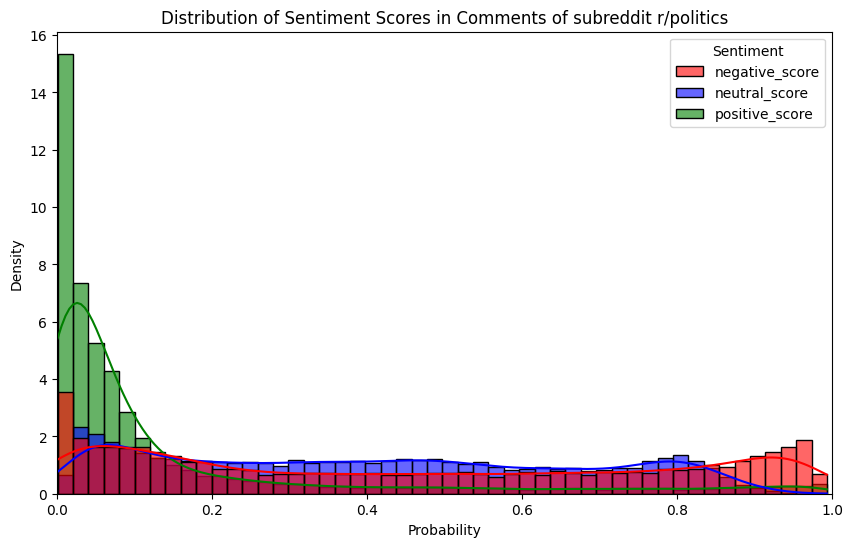

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_long,
    x="Probability",
    hue="Sentiment",
    bins=50,
    kde=True,
    stat="density",
    common_norm=False,
    palette={"negative_score": "red", "neutral_score": "blue", "positive_score": "green"},
    alpha=0.6
)
plt.xlim(0,1)
# make comments in english
plt.title("Distribution of Sentiment Scores in Comments of subreddit r/politics")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()

## Posts

In [6]:
df = manager.get_posts_features_by_subreddit("politics")
df

,post_id,fetch_type,avg_positive,avg_neutral,avg_negative,pct_positive,pct_negative,num_comments
0,1ndlbj5,hot,0.113532,0.456665,0.429803,8.433735,44.578313,83.0
1,1ndhwc6,hot,0.091686,0.423140,0.485174,5.527638,47.738693,199.0
2,1nd97ga,hot,0.114532,0.344152,0.541316,9.693878,57.653061,196.0
3,1ncyntv,hot,0.142196,0.256386,0.601417,12.328767,64.383562,73.0
4,1ndf6yu,hot,0.083209,0.409163,0.507629,2.941176,55.882353,68.0
...,...,...,...,...,...,...,...,...
56,1ndl31k,hot,0.097600,0.295344,0.607056,7.070707,67.676768,198.0
57,1ndcar5,hot,0.104577,0.365751,0.529672,7.179487,57.948718,195.0
58,1ndjcll,new,NaN,NaN,NaN,NaN,NaN,NaN
59,1ndrfg5,new,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols = ["avg_negative", "avg_neutral", "avg_positive"]

df_long = df[cols].melt(var_name="sentiment", value_name="probability")
df_long

,sentiment,probability
0,avg_negative,0.429803
1,avg_negative,0.485174
2,avg_negative,0.541316
3,avg_negative,0.601417
4,avg_negative,0.507629
...,...,...
178,avg_positive,0.097600
179,avg_positive,0.104577
180,avg_positive,NaN
181,avg_positive,NaN


In [8]:
import plotly.express as px

fig = px.histogram(
    df_long,
    x='probability',
    color='sentiment',
    nbins=25,
    barmode='overlay',  # barre sovrapposte
    opacity=0.85,        # trasparenza per vedere sovrapposizioni
    histnorm='percent',  # normalizza le distribuzioni
    color_discrete_sequence=px.colors.qualitative.Set2  # colori soft
)

# Miglioramenti estetici
fig.update_traces(marker_line_width=0)  # rimuove bordo barre
fig.update_layout(
    xaxis_title="Sentiment Score (Probability)",
    yaxis_title="Percentage of Posts (%)",
    legend_title="Sentiment",
    xaxis=dict(fixedrange=True),
    yaxis=dict(fixedrange=True),
    dragmode=False,
    hovermode=False,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Mostra nel notebook o in Streamlit
fig.show()  # solo per notebook

In [9]:
df

,post_id,fetch_type,avg_positive,avg_neutral,avg_negative,pct_positive,pct_negative,num_comments
0,1ndlbj5,hot,0.113532,0.456665,0.429803,8.433735,44.578313,83.0
1,1ndhwc6,hot,0.091686,0.423140,0.485174,5.527638,47.738693,199.0
2,1nd97ga,hot,0.114532,0.344152,0.541316,9.693878,57.653061,196.0
3,1ncyntv,hot,0.142196,0.256386,0.601417,12.328767,64.383562,73.0
4,1ndf6yu,hot,0.083209,0.409163,0.507629,2.941176,55.882353,68.0
...,...,...,...,...,...,...,...,...
56,1ndl31k,hot,0.097600,0.295344,0.607056,7.070707,67.676768,198.0
57,1ndcar5,hot,0.104577,0.365751,0.529672,7.179487,57.948718,195.0
58,1ndjcll,new,NaN,NaN,NaN,NaN,NaN,NaN
59,1ndrfg5,new,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import plotly.figure_factory as ff
from numpy.random import default_rng as rng

group_labels = ["avg_negative", "avg_neutral", "avg_positive"]

df = df.dropna(subset=["avg_negative", "avg_neutral", "avg_positive"])
df_plot = [df["avg_negative"], df["avg_neutral"], df["avg_positive"]]

fig = ff.create_distplot(
    df_plot, group_labels
)

fig.update_layout(
    title_text="Distribution of Average Sentiment Scores in Posts of subreddit r/politics",
    xaxis_title="Sentiment Score (Probability)",
    yaxis_title="Density",
    legend_title="Sentiment Category"
)
fig.show()  # solo per notebook

In [11]:
df

,post_id,fetch_type,avg_positive,avg_neutral,avg_negative,pct_positive,pct_negative,num_comments
0,1ndlbj5,hot,0.113532,0.456665,0.429803,8.433735,44.578313,83.0
1,1ndhwc6,hot,0.091686,0.423140,0.485174,5.527638,47.738693,199.0
2,1nd97ga,hot,0.114532,0.344152,0.541316,9.693878,57.653061,196.0
3,1ncyntv,hot,0.142196,0.256386,0.601417,12.328767,64.383562,73.0
4,1ndf6yu,hot,0.083209,0.409163,0.507629,2.941176,55.882353,68.0
5,1muqof2,top,0.089739,0.390694,0.519566,4.123711,49.484536,194.0
6,1nbwc03,top,0.096725,0.269811,0.633465,7.446809,69.148936,188.0
7,1nd15qv,hot,0.077466,0.339177,0.583357,3.517588,62.311558,199.0
8,1mug3vp,top,0.136505,0.301285,0.562210,10.106383,67.553191,188.0
9,1ndoi06,hot,0.125597,0.341476,0.532927,12.903226,64.516129,31.0


In [15]:
import plotly.express as px
import pandas as pd

# calcola numero reale di commenti positivi e negativi
df['num_positive'] = (df['pct_positive'] * df['num_comments'] / 100).round().astype(int)
df['num_negative'] = (df['pct_negative'] * df['num_comments'] / 100).round().astype(int)

# rendi negativi i commenti negativi per diverging chart
df['num_negative'] = -df['num_negative']

# seleziona i 5 post più commentati
df = df.sort_values(by='num_comments', ascending=False)
top5 = df.nlargest(10, 'num_comments').copy()

# prepara dati in formato long
df_long = top5.melt(
    id_vars=['post_id', 'num_comments'],  # aggiungo num_comments
    value_vars=['num_positive', 'num_negative'],
    var_name='sentiment',
    value_name='count'
)
df_long


,post_id,num_comments,sentiment,count
0,1mwtpnn,244.0,num_positive,17
1,1nciini,232.0,num_positive,7
2,1n99ni5,226.0,num_positive,10
3,1ncun7v,199.0,num_positive,6
4,1nd15qv,199.0,num_positive,7
5,1ndhwc6,199.0,num_positive,11
6,1ndc7qh,198.0,num_positive,13
7,1ncxxi8,198.0,num_positive,13
8,1nclmwz,198.0,num_positive,5
9,1ndpwx3,198.0,num_positive,12


In [16]:
color_map = {'num_positive': 'blue', 'num_negative': 'red'}

# crea il bar chart orizzontale diverging usando num_comments come asse y
fig = px.bar(
    df_long,
    y='num_comments',  # ora l’asse y mostra il totale dei commenti
    x='count',
    color='sentiment',
    orientation='h',
    text='count',
    color_discrete_map=color_map,
    hover_data=['post_id']  # così si vede anche il post ID
)

fig.update_layout(
    title="Top 5 post con più commenti: positivi vs negativi (diverging)",
    xaxis_title="Numero di commenti",
    yaxis_title="Commenti totali",
    showlegend=True
)

fig.show()

In [ ]:
# calcola numero di commenti positivi e negativi
df['num_positive'] = (df['pct_positive'] * df['num_comments'] / 100).round().astype(int)
df['num_negative'] = (df['pct_negative'] * df['num_comments'] / 100).round().astype(int)

# prendi i 5 post con più commenti
top5 = df.nlargest(5, 'num_comments').copy()

df_long = top5.melt(
    id_vars=['post_id'],
    value_vars=['num_positive', 'num_negative'],
    var_name='sentiment',
    value_name='count'
)

# colori
color_map = {'num_positive': 'blue', 'num_negative': 'red'}

# crea bar chart orizzontale
fig = px.bar(
    df_long,
    y='post_id',
    x='count',
    color='sentiment',
    orientation='h',
    text='count',
    color_discrete_map=color_map,
    barmode='relative'  # barre divise per lato
)

fig.update_layout(
    title="Top 5 post con più commenti: positivi vs negativi",
    xaxis_title="Numero di commenti",
    yaxis_title="Post ID",
    yaxis={'categoryorder':'total ascending'},
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True
)

fig.show()  # solo per notebook